C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3579: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


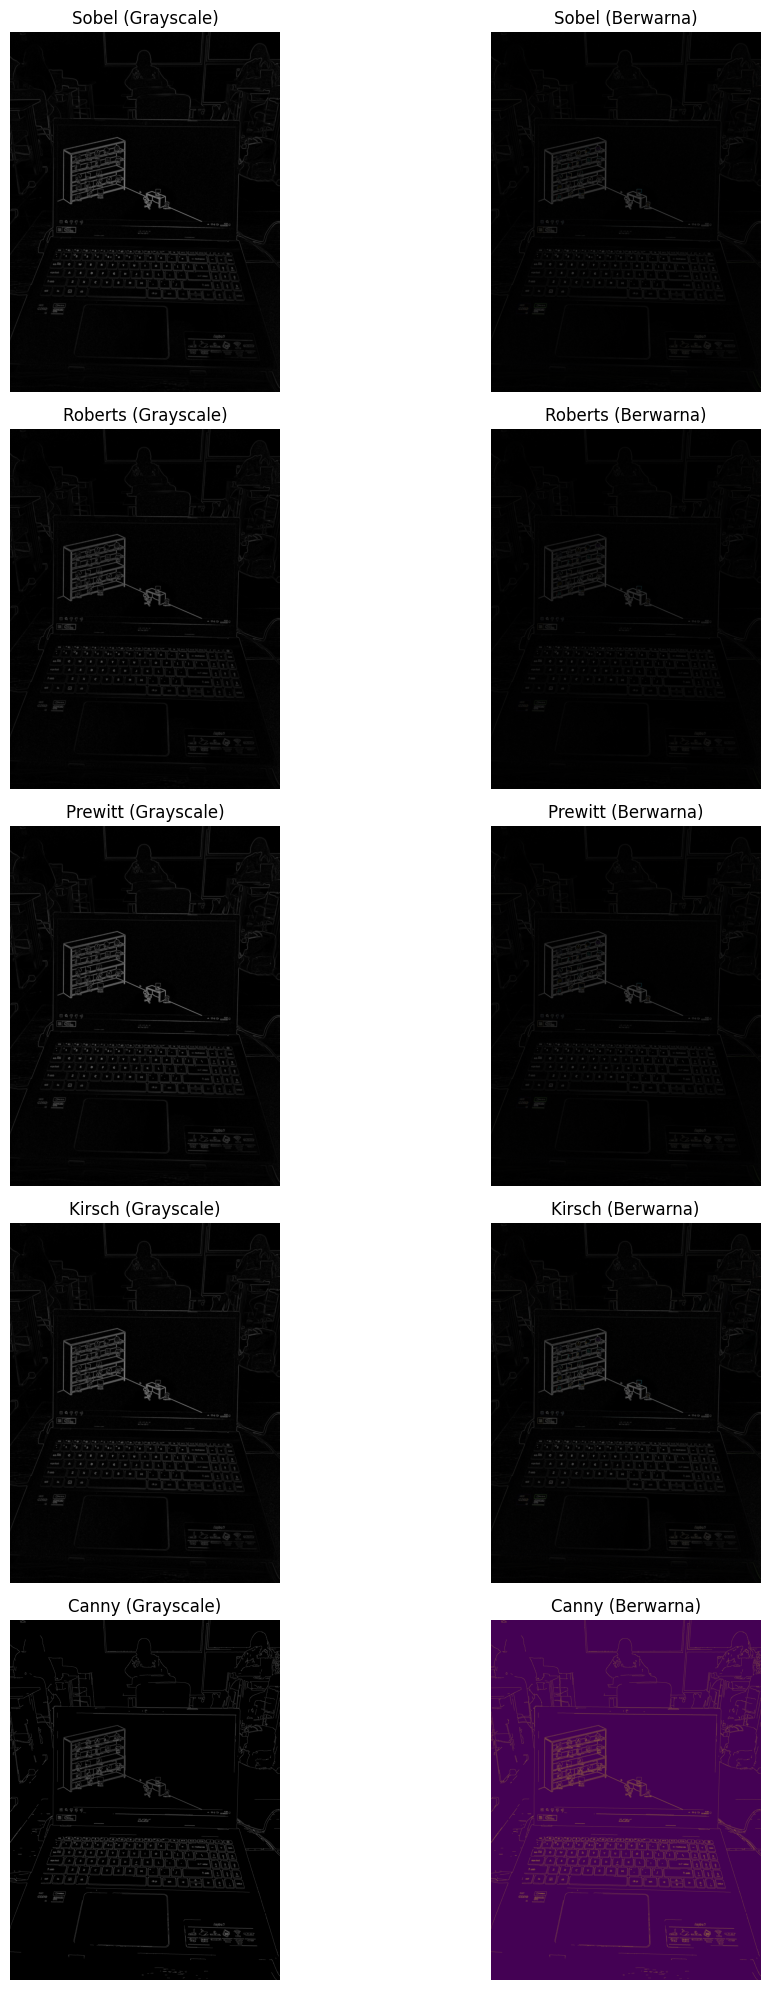

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk
from skimage.io import imread

# ===================== 1⃣ AMBIL GAMBAR DARI FILE =====================
# Membaca gambar dari file eksternal
image_color = imread("haydar.jpeg")  # Pastikan file "gambar.jpeg" berada di direktori yang sama
image_gray = color.rgb2gray(image_color)  # Konversi gambar berwarna ke grayscale

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
# Fungsi untuk menerapkan deteksi tepi pada setiap kanal warna
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL =====================
# Daftar hasil deteksi tepi
titles = [
    "Sobel", "Roberts", "Prewitt", "Kirsch", "Canny"
]
grayscale_results = [sobel_gray, roberts_gray, prewitt_gray, kirsch_gray, canny_gray]
color_results = [sobel_color, roberts_color, prewitt_color, kirsch_color, canny_color]

# Atur jumlah subplot sesuai data
num_operators = len(titles)
fig, axes = plt.subplots(num_operators, 2, figsize=(12, 4 * num_operators))
axes = axes.ravel()

# ----- Tampilkan hasil deteksi tepi -----
for i, title in enumerate(titles):
    # Grayscale
    axes[i * 2].imshow(grayscale_results[i], cmap="gray")
    axes[i * 2].set_title(f"{title} (Grayscale)")
    axes[i * 2].axis("off")
    
    # Berwarna
    axes[i * 2 + 1].imshow(color_results[i])
    axes[i * 2 + 1].set_title(f"{title} (Berwarna)")
    axes[i * 2 + 1].axis("off")

plt.tight_layout()
plt.show()
